In [24]:
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

# === Last inn datasett for kort periode ===
df = pd.read_csv("data/processed/summary_statistics.csv", sep=";")
df.columns = df.columns.str.strip()

# Konverter dato og trekk ut måned
df['Dato'] = pd.to_datetime(df['Dato'], errors='coerce')
df = df.dropna(subset=['Dato'])
df['måned'] = df['Dato'].dt.to_period('M')

# Lag lagget rensefiskandel (per PO)
df = df.sort_values(['PO', 'måned'])
df['% Rensefisk_lag1'] = df.groupby('PO')['% Rensefisk'].shift(1)

# Kvadrert temperatur
df["Temperatur2"] = df["Temperature"]**2

# Fjern rader med manglende verdier
relevante_kolonner = [
    "% Dødfisk", "Temperature", "Temperatur2", "Tetthet", "BA_ano", "% FORFORBRUK",
    "% Rensefisk_lag1", "badebehandling", "mekanisk behandling", "termisk behandling", "PO"
]
df = df.dropna(subset=relevante_kolonner)

# Skriv ut antall observasjoner
print(f"Antall observasjoner brukt i analysen (2012–2024): {len(df)}")

# === Definer modeller ===
f1 = 'Q("% Dødfisk") ~ Q("Temperature") + C(PO)'
f2 = 'Q("% Dødfisk") ~ Q("Temperature") + Q("Temperatur2") + C(PO)'
f3 = 'Q("% Dødfisk") ~ Q("Temperature") + Q("Temperatur2") + Q("Tetthet") + Q("BA_ano") + C(PO)'
f4 = 'Q("% Dødfisk") ~ Q("Temperature") + Q("Temperatur2") + Q("Tetthet") + Q("BA_ano") + Q("% Rensefisk_lag1") + Q("badebehandling") + Q("mekanisk behandling") + Q("termisk behandling") + C(PO)'

# === Estimer modeller ===
model1 = smf.ols(f1, data=df).fit(cov_type='HC3')
model2 = smf.ols(f2, data=df).fit(cov_type='HC3')
model3 = smf.ols(f3, data=df).fit(cov_type='HC3')
model4 = smf.ols(f4, data=df).fit(cov_type='HC3')

# === Lag regresjonstabell ===
summary = summary_col(
    [model1, model2, model3, model4],
    stars=True,
    float_format='%0.4f',
    model_names=["(1)", "(2)", "(3)", "(4)"],
    info_dict={
        'R-squared': lambda x: f"{x.rsquared:.3f}",
        'N': lambda x: f"{int(x.nobs)}"
    },
    regressor_order=[
        'Intercept',
        'Q("Temperature")',
        'Q("Temperatur2")',
        'Q("Tetthet")',
        'Q("BA_ano")',
        'Q("% Rensefisk_lag1")',
        'Q("badebehandling")',
        'Q("mekanisk behandling")',
        'Q("termisk behandling")',
    ]
)

# === Vis resultater ===
print(summary)

# === Lagre LaTeX-tabell (valgfritt) ===
#with open("results/regresjonsresultater_2017_2024.tex", "w") as f:
   #f.write(summary.as_latex())


Antall observasjoner brukt i analysen (2017–2024): 1813

                            (1)        (2)        (3)        (4)    
--------------------------------------------------------------------
Intercept                0.8474***  1.1957***  1.1416***  1.1495*** 
                         (0.0512)   (0.0779)   (0.0780)   (0.0792)  
Q("Temperature")         0.0091***  -0.0868*** -0.0952*** -0.0968***
                         (0.0028)   (0.0143)   (0.0142)   (0.0145)  
Q("Temperatur2")                    0.0049***  0.0053***  0.0052*** 
                                    (0.0008)   (0.0007)   (0.0008)  
Q("Tetthet")                                   0.0266***  0.0236*** 
                                               (0.0055)   (0.0055)  
Q("BA_ano")                                    0.0011     0.0062    
                                               (0.0091)   (0.0094)  
Q("% Rensefisk_lag1")                                     0.0471*** 
                                              

Fra 2017

In [14]:
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

# === Last inn datasett for kort periode ===
df = pd.read_csv("data/processed/summary_statistics_2017.csv", sep=";")
df.columns = df.columns.str.strip()

# Konverter dato og trekk ut måned
df['Dato'] = pd.to_datetime(df['Dato'], errors='coerce')
df = df.dropna(subset=['Dato'])
df['måned'] = df['Dato'].dt.to_period('M')

# Lag lagget rensefiskandel (per PO)
df = df.sort_values(['PO', 'måned'])
df['% Rensefisk_lag1'] = df.groupby('PO')['% Rensefisk'].shift(1)

# Kvadrert temperatur
df["Temperatur2"] = df["Temperature"]**2

# Fjern rader med manglende verdier
relevante_kolonner = [
    "% Dødfisk", "Temperature", "Temperatur2", "Tetthet", "BA_ano", "% FORFORBRUK",
    "% Rensefisk_lag1", "badebehandling", "mekanisk behandling", "termisk behandling", "PO"
]
df = df.dropna(subset=relevante_kolonner)

# Skriv ut antall observasjoner
print(f"Antall observasjoner brukt i analysen (2017–2024): {len(df)}")

# === Definer modeller ===
f1 = 'Q("% Dødfisk") ~ Q("Temperature") + C(PO)'
f2 = 'Q("% Dødfisk") ~ Q("Temperature") + Q("Temperatur2") + C(PO)'
f3 = 'Q("% Dødfisk") ~ Q("Temperature") + Q("Temperatur2") + Q("Tetthet") + Q("BA_ano") + C(PO)'
f4 = 'Q("% Dødfisk") ~ Q("Temperature") + Q("Temperatur2") + Q("Tetthet") + Q("BA_ano") + Q("% Rensefisk_lag1") + Q("badebehandling") + Q("mekanisk behandling") + Q("termisk behandling") + C(PO)'

# === Estimer modeller ===
model1 = smf.ols(f1, data=df).fit(cov_type='HC3')
model2 = smf.ols(f2, data=df).fit(cov_type='HC3')
model3 = smf.ols(f3, data=df).fit(cov_type='HC3')
model4 = smf.ols(f4, data=df).fit(cov_type='HC3')

# === Lag regresjonstabell ===
summary = summary_col(
    [model1, model2, model3, model4],
    stars=True,
    float_format='%0.4f',
    model_names=["(1)", "(2)", "(3)", "(4)"],
    info_dict={
        'R-squared': lambda x: f"{x.rsquared:.3f}",
        'N': lambda x: f"{int(x.nobs)}"
    },
    regressor_order=[
        'Intercept',
        'Q("Temperature")',
        'Q("Temperatur2")',
        'Q("Tetthet")',
        'Q("BA_ano")',
        'Q("% FORFORBRUK")',
        'Q("% Rensefisk_lag1")',
        'Q("badebehandling")',
        'Q("mekanisk behandling")',
        'Q("termisk behandling")',
    ]
)

# === Vis resultater ===
print(summary)

# === Lagre LaTeX-tabell (valgfritt) ===
#with open("results/regresjonsresultater_2017_2024.tex", "w") as f:
   #f.write(summary.as_latex())


Antall observasjoner brukt i analysen (2017–2024): 947

                            (1)        (2)        (3)        (4)    
--------------------------------------------------------------------
Intercept                0.8750***  1.1865***  1.1506***  1.1545*** 
                         (0.0790)   (0.1210)   (0.1181)   (0.1177)  
Q("Temperature")         -0.0160*** -0.0991*** -0.1125*** -0.1184***
                         (0.0039)   (0.0203)   (0.0206)   (0.0207)  
Q("Temperatur2")                    0.0042***  0.0048***  0.0050*** 
                                    (0.0010)   (0.0010)   (0.0010)  
Q("Tetthet")                                   0.0439***  0.0389*** 
                                               (0.0092)   (0.0090)  
Q("BA_ano")                                    -0.0054    0.0034    
                                               (0.0125)   (0.0128)  
Q("% Rensefisk_lag1")                                     0.0315*   
                                               

Nærmest Eirik sin: 

In [35]:
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

# === Last inn data ===
df = pd.read_csv("data/processed/summary_statistics_2017.csv", sep=";")
df.columns = df.columns.str.strip()

# Konverter dato og trekk ut måned
df['Dato'] = pd.to_datetime(df['Dato'], errors='coerce')
df = df.dropna(subset=['Dato'])
df['måned'] = df['Dato'].dt.to_period('M')

# Lag lagget rensefiskandel (per PO)
df = df.sort_values(['PO', 'måned'])
df['% Rensefisk_lag1'] = df.groupby('PO')['% Rensefisk'].shift(1)

# Kvadrert temperatur
df["Temperatur2"] = df["Temperature"]**2

# Drop rader med NaN i nødvendige kolonner
relevante_kolonner = [
    "% Dødfisk", "Temperature", "Temperatur2", "Tetthet", "BA_ano",
    "% FORFORBRUK", "% Rensefisk_lag1", "badebehandling", 
    "mekanisk behandling", "termisk behandling", "PO"
]
df = df.dropna(subset=relevante_kolonner)

# === Definer modeller ===
f1 = 'Q("% Dødfisk") ~ Q("Temperature") + C(PO)'
f2 = 'Q("% Dødfisk") ~ Q("Temperature") + Q("Temperatur2") + C(PO)'
f3 = 'Q("% Dødfisk") ~ Q("Temperature") + Q("Temperatur2") + Q("Tetthet") + Q("BA_ano") + Q("% FORFORBRUK") + C(PO)'
f4 = 'Q("% Dødfisk") ~ Q("Temperature") + Q("Temperatur2") + Q("Tetthet") + Q("BA_ano") + Q("% FORFORBRUK") + Q("% Rensefisk_lag1") + Q("badebehandling") + Q("mekanisk behandling") + Q("termisk behandling") + C(PO)'
# === Estimer modeller ===
model1 = smf.ols(f1, data=df).fit(cov_type='HC3')
model2 = smf.ols(f2, data=df).fit(cov_type='HC3')
model3 = smf.ols(f3, data=df).fit(cov_type='HC3')
model4 = smf.ols(f4, data=df).fit(cov_type='HC3')

# === Lag regresjonstabell ===
summary = summary_col(
    [model1, model2, model3, model4],
    stars=True,
    float_format='%0.4f',
    model_names=["(1)", "(2)", "(3)", "(4)"],
    info_dict={
        'R-squared': lambda x: f"{x.rsquared:.3f}",
        'N': lambda x: f"{int(x.nobs)}"
    },
    regressor_order=[
        'Intercept',
        'Q("Temperature")',
        'Q("Temperatur2")',
        'Q("Tetthet")',
        'Q("BA_ano")',
        'Q("% FORFORBRUK")',
        'Q("% Rensefisk_lag1")',
        'Q("badebehandling")',
        'Q("mekanisk behandling")',
        'Q("termisk behandling")',
    ]
)

# === Print resultater ===
print(summary)

df_clean = df.dropna(subset=relevante_kolonner)
print(len(df_clean))



                            (1)        (2)        (3)        (4)    
--------------------------------------------------------------------
Intercept                0.8750***  1.1865***  1.0579***  1.0539*** 
                         (0.0790)   (0.1210)   (0.1119)   (0.1107)  
Q("Temperature")         -0.0160*** -0.0991*** 0.0022     0.0025    
                         (0.0039)   (0.0203)   (0.0289)   (0.0286)  
Q("Temperatur2")                    0.0042***  0.0014     0.0014    
                                    (0.0010)   (0.0011)   (0.0011)  
Q("Tetthet")                                   0.0408***  0.0347*** 
                                               (0.0088)   (0.0086)  
Q("BA_ano")                                    -0.0364**  -0.0282** 
                                               (0.0144)   (0.0144)  
Q("% FORFORBRUK")                              -0.0310*** -0.0328***
                                               (0.0059)   (0.0059)  
Q("% Rensefisk_lag1")            

Test for multilinæritet:

In [9]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# === Last inn datasett ===
df_all = pd.read_csv("data/processed/summary_statistics.csv", sep=";")
df_short = pd.read_csv("data/processed/summary_statistics_2017.csv", sep=";")

# === Funksjon for å klargjøre data og beregne VIF ===
def kjør_vif_analysis(df):
    df.columns = df.columns.str.strip()
    df['Dato'] = pd.to_datetime(df['Dato'], errors='coerce')
    df = df.dropna(subset=['Dato'])
    df['måned'] = df['Dato'].dt.to_period('M')
    df = df.sort_values(['PO', 'måned'])
    df['% Rensefisk_lag1'] = df.groupby('PO')['% Rensefisk'].shift(1)
    df["Temperatur2"] = df["Temperature"] ** 2

    relevante_kolonner = [
        "Temperature", "Temperatur2", "Tetthet", "BA_ano", "% FORFORBRUK",
        "% Rensefisk_lag1", "badebehandling", "mekanisk behandling", "termisk behandling"
    ]
    df_vif = df[relevante_kolonner].dropna()

    vif_df = pd.DataFrame()
    vif_df["Variabel"] = df_vif.columns
    vif_df["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
    return vif_df

# === Filter for 2017–2024 for kort horisont ===
df_short['Dato'] = pd.to_datetime(df_short['Dato'], errors='coerce')
df_short_filtered = df_short[(df_short['Dato'] >= "2017-01-01") & (df_short['Dato'] <= "2024-12-31")]

# === Kjør VIF for begge datasett ===
vif_lang = kjør_vif_analysis(df_all)
vif_kort = kjør_vif_analysis(df_short_filtered)

# === Skriv ut resultatene ===
print("\nVIF for lang horisont (2012–2024):")
print(vif_lang)

print("\nVIF for kort horisont (2017–2024):")
print(vif_kort)



VIF for lang horisont (2012–2024):
              Variabel         VIF
0          Temperature  175.877983
1          Temperatur2   36.335632
2              Tetthet    4.796042
3               BA_ano    1.377613
4         % FORFORBRUK   64.600703
5     % Rensefisk_lag1    1.554819
6       badebehandling    2.908668
7  mekanisk behandling    2.892658
8   termisk behandling    2.871613

VIF for kort horisont (2017–2024):
              Variabel         VIF
0          Temperature  165.353880
1          Temperatur2   35.778397
2              Tetthet    4.934999
3               BA_ano    1.372747
4         % FORFORBRUK   59.677139
5     % Rensefisk_lag1    1.709830
6       badebehandling    2.294902
7  mekanisk behandling    2.933623
8   termisk behandling    2.907976


/var/folders/bq/c32p7bj504jfbvsz2xcgkl1m0000gn/T/ipykernel_51350/3929492010.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dato'] = pd.to_datetime(df['Dato'], errors='coerce')


In [12]:
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

# === Last inn datasett ===
df_all = pd.read_csv("data/processed/summary_statistics.csv", sep=";")
df_short = pd.read_csv("data/processed/summary_statistics.csv", sep=";")

# === Forbered data ===
def klargjør_data(df):
    df.columns = df.columns.str.strip()
    df['Dato'] = pd.to_datetime(df['Dato'], errors='coerce')
    df = df.dropna(subset=['Dato'])
    df['måned'] = df['Dato'].dt.to_period('M')
    df = df.sort_values(['PO', 'måned'])
    df['Temperatur2'] = df["Temperature"] ** 2
    return df

df_all = klargjør_data(df_all)
df_short = klargjør_data(df_short)
df_short_filtered = df_short[(df_short['Dato'] >= "2017-01-01") & (df_short['Dato'] <= "2024-12-31")]

# === Kjør VIF-analyse (modell f3 uten lakselus-variabler) ===
def kjør_vif_analysis(df):
    relevante_kolonner = [
        "Temperature", "Tetthet", "BA_ano"
    ]
    df_vif = df[relevante_kolonner].dropna()
    vif_df = pd.DataFrame()
    vif_df["Variabel"] = df_vif.columns
    vif_df["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
    return vif_df

vif_resultat = kjør_vif_analysis(df_short_filtered)
print("\nVIF-resultat for modell f3 (2017–2024):")
print(vif_resultat)

# === Kjør OLS-modell f3 ===
formel_f3 = 'Q("% Dødfisk") ~ Q("Temperature") + Q("Tetthet") + Q("BA_ano") + C(PO)'
df_model = df_short_filtered.dropna(subset=[
    "% Dødfisk", "Temperature", "Tetthet", "BA_ano", "PO"
])
modell_f3 = smf.ols(formula=formel_f3, data=df_model).fit(cov_type='HC3')

# === Vis modellresultater ===
print("\nResultater for OLS-modell f3 (2017–2024):")
print(modell_f3.summary())



VIF-resultat for modell f3 (2017–2024):
      Variabel       VIF
0  Temperature  3.618391
1      Tetthet  3.336771
2       BA_ano  1.176917

Resultater for OLS-modell f3 (2017–2024):
                            OLS Regression Results                            
Dep. Variable:         Q("% Dødfisk")   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     63.94
Date:                Fri, 09 May 2025   Prob (F-statistic):          2.07e-138
Time:                        11:05:51   Log-Likelihood:                -417.56
No. Observations:                1126   AIC:                             867.1
Df Residuals:                    1110   BIC:                             947.5
Df Model:                          15                                         
Covariance Type:                  HC3                                         
                       coe

In [19]:
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

# === Last inn datasett ===
df_short = pd.read_csv("data/processed/summary_statistics.csv", sep=";")

# === Forbered data ===
def klargjør_data(df):
    df.columns = df.columns.str.strip()
    df['Dato'] = pd.to_datetime(df['Dato'], errors='coerce')
    df = df.dropna(subset=['Dato'])
    df['måned'] = df['Dato'].dt.to_period('M')
    df = df.sort_values(['PO', 'måned'])
    df['Temperatur2'] = df["Temperature"] ** 2
    return df

df_short = klargjør_data(df_short)
df_short_filtered = df_short[(df_short['Dato'] >= "2017-01-01") & (df_short['Dato'] <= "2024-12-31")]

# === Kjør VIF-analyse (modell f2) ===
def kjør_vif_analysis(df):
    relevante_kolonner = ["Temperature", "Temperatur2"]
    df_vif = df[relevante_kolonner].dropna()
    vif_df = pd.DataFrame()
    vif_df["Variabel"] = df_vif.columns
    vif_df["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
    return vif_df

vif_resultat = kjør_vif_analysis(df_short_filtered)
print("\nVIF-resultat for modell f2 (2017–2024):")
print(vif_resultat)

# === Kjør OLS-modell f2 ===
formel_f2 = 'Q("% Dødfisk") ~ Q("Temperature") + Q("Temperatur2") + C(PO)'
df_model = df_short_filtered.dropna(subset=["% Dødfisk", "Temperature", "Temperatur2", "PO"])
modell_f2 = smf.ols(formula=formel_f2, data=df_model).fit(cov_type='HC3')

# === Vis modellresultater ===
print("\nResultater for OLS-modell f2 (2017–2024):")
print(modell_f2.summary())



VIF-resultat for modell f2 (2017–2024):
      Variabel        VIF
0  Temperature  12.196633
1  Temperatur2  12.196633

Resultater for OLS-modell f2 (2017–2024):
                            OLS Regression Results                            
Dep. Variable:         Q("% Dødfisk")   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     71.81
Date:                Sun, 04 May 2025   Prob (F-statistic):          1.69e-144
Time:                        16:11:14   Log-Likelihood:                -410.04
No. Observations:                1126   AIC:                             850.1
Df Residuals:                    1111   BIC:                             925.5
Df Model:                          14                                         
Covariance Type:                  HC3                                         
                       coef    std err          

In [21]:
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan

# === Last inn og klargjør data ===
df = pd.read_csv("data/processed/summary_statistics.csv", sep=";")
df.columns = df.columns.str.strip()
df["Dato"] = pd.to_datetime(df["Dato"], errors="coerce")
df = df.dropna(subset=["Dato"])
df["måned"] = df["Dato"].dt.to_period("M")
df = df.sort_values(["PO", "måned"])
df["% Rensefisk_lag1"] = df.groupby("PO")["% Rensefisk"].shift(1)
df["Temperatur2"] = df["Temperature"]**2

# === Rens data for Modell 4 ===
relevante_kolonner = [
    "% Dødfisk", "Temperature", "Temperatur2", "Tetthet", "BA_ano", "% FORFORBRUK",
    "% Rensefisk_lag1", "badebehandling", "mekanisk behandling", "termisk behandling", "PO"
]
df = df.dropna(subset=relevante_kolonner)

# === Modell 4 med PO-fixed effects ===
formel = '`% Dødfisk` ~ Temperature + Temperatur2 + Tetthet + BA_ano + Q("% FORFORBRUK") + Q("% Rensefisk_lag1") + badebehandling + Q("mekanisk behandling") + Q("termisk behandling") + C(PO)'
model = smf.ols(formel, data=df).fit()

# === Breusch–Pagan-test ===
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model.resid, model.model.exog)
bp_results = {
    "LM-statistikk": bp_test[0],
    "LM p-verdi": bp_test[1],
    "F-statistikk": bp_test[2],
    "F p-verdi": bp_test[3]
}

# === Skriv ut resultater ===
print("Breusch–Pagan-test (med PO):")
for navn, verdi in bp_results.items():
    print(f"{navn}: {verdi:.4f}")


PatsyError: error tokenizing input (maybe an unclosed string?)
    `% Dødfisk` ~ Temperature + Temperatur2 + Tetthet + BA_ano + Q("% FORFORBRUK") + Q("% Rensefisk_lag1") + badebehandling + Q("mekanisk behandling") + Q("termisk behandling") + C(PO)
    ^

In [32]:
import pandas as pd

# Steg 1: Les inn dataene
summary_statistics = pd.read_csv('data/processed/summary_statistics.csv', sep=';')
summary_statistics_2017 = pd.read_csv('data/processed/summary_statistics_2017.csv', sep=';')

# Steg 2: Standardiser kolonnenavn
rename_map = {
    "% Dødfisk": "dødfisk_pct",
    "Temperature": "temp",
    "Temperatur2": "temp_sq",  # I tilfelle kolonnen faktisk finnes
    "Tetthet": "tett_massekm2",
    "BA_ano": "ba_ano",
    "% FORFORBRUK": "for_pct",
    "% Rensefisk_lag1": "rensefisk_pct",
    "badebehandling": "badebeh",
    "PO": "PO"
}

summary_statistics.rename(columns=rename_map, inplace=True)
summary_statistics_2017.rename(columns=rename_map, inplace=True)

# Steg 3: Lag temp_sq manuelt hvis ikke tilstede
def ensure_temp_sq(df):
    if "temp" in df.columns and "temp_sq" not in df.columns:
        df["temp_sq"] = df["temp"] ** 2

ensure_temp_sq(summary_statistics)
ensure_temp_sq(summary_statistics_2017)

# Steg 4: Definer modellvariabler
variables_model = [
    ["dødfisk_pct", "temp", "tett_massekm2", "ba_ano", "for_pct", "PO"],
]

# Steg 5: Lag korrelasjonsmatriser og samle dem i én DataFrame
combined_df = pd.DataFrame()
for i, dataset in enumerate([summary_statistics, summary_statistics_2017]):
    horizon = "Lang_horisont" if i == 0 else "Kort_horisont"
    for j, vars_model in enumerate(variables_model):
        numeric_vars = [var for var in vars_model if var != "PO" and var in dataset.columns]
        corr_matrix = dataset[numeric_vars].corr().round(3)
        corr_matrix.insert(0, 'Variable', corr_matrix.index)
        corr_matrix['Modell'] = f"{horizon}_Modell_{j+1 + i*4}"
        combined_df = pd.concat([combined_df, corr_matrix], ignore_index=True)

# Lagre alt i én CSV-fil
combined_df.to_csv("alle_korrelasjonsmatriser.csv", index=False)

# Vis til terminal
print(combined_df.head(20))


        Variable  dødfisk_pct   temp  tett_massekm2  ba_ano  for_pct  \
0    dødfisk_pct        1.000  0.186          0.292   0.014    0.008   
1           temp        0.186  1.000          0.134   0.457    0.870   
2  tett_massekm2        0.292  0.134          1.000  -0.033    0.090   
3         ba_ano        0.014  0.457         -0.033   1.000    0.314   
4        for_pct        0.008  0.870          0.090   0.314    1.000   
5    dødfisk_pct        1.000 -0.015          0.365  -0.109   -0.142   
6           temp       -0.015  1.000          0.165   0.459    0.847   
7  tett_massekm2        0.365  0.165          1.000  -0.029    0.109   
8         ba_ano       -0.109  0.459         -0.029   1.000    0.294   
9        for_pct       -0.142  0.847          0.109   0.294    1.000   

                   Modell  
0  Lang_horisont_Modell_1  
1  Lang_horisont_Modell_1  
2  Lang_horisont_Modell_1  
3  Lang_horisont_Modell_1  
4  Lang_horisont_Modell_1  
5  Kort_horisont_Modell_5  
6  Kort_hor

In [6]:
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

# === Last inn datasett ===
df = pd.read_csv("data/processed/summary_statistics_2017.csv", sep=";")
df.columns = df.columns.str.strip()

# Konverter dato og trekk ut måned
df['Dato'] = pd.to_datetime(df['Dato'], errors='coerce')
df = df.dropna(subset=['Dato'])
df['måned'] = df['Dato'].dt.to_period('M')

# Sorter og lag laggede variabler per PO
df = df.sort_values(['PO', 'måned'])
df['% Rensefisk_lag1'] = df.groupby('PO')['% Rensefisk'].shift(2)
df['% FORFORBRUK_lag1'] = df.groupby('PO')['% FORFORBRUK'].shift(2)
df['Temperature_lag1'] = df.groupby('PO')['Temperature'].shift(2)

# Kvadrert lagget temperatur
df["Temperatur2_lag1"] = df["Temperature_lag1"]**2

# Fjern rader med manglende verdier
relevante_kolonner = [
    "% Dødfisk", "Temperature_lag1", "Temperatur2_lag1",
    "Tetthet", "BA_ano", "% FORFORBRUK", "% FORFORBRUK_lag1",
    "% Rensefisk_lag1", "badebehandling", "mekanisk behandling",
    "termisk behandling", "PO"
]
df = df.dropna(subset=relevante_kolonner)

# Antall observasjoner
print(f"Antall observasjoner brukt i analysen (2017–2024): {len(df)}")

# === Definer modeller ===
f1 = 'Q("% Dødfisk") ~ Q("Temperature_lag1") + C(PO)'
f2 = 'Q("% Dødfisk") ~ Q("Temperature_lag1") + Q("Temperatur2_lag1") + C(PO)'
f3 = ('Q("% Dødfisk") ~ Q("Temperature_lag1") + Q("Temperatur2_lag1") + '
      'Q("Tetthet") + Q("BA_ano") + Q("% FORFORBRUK") + C(PO)')
f4 = ('Q("% Dødfisk") ~ Q("Temperature_lag1") + Q("Temperatur2_lag1") + '
      'Q("Tetthet") + Q("BA_ano") + Q("% FORFORBRUK") + Q("% FORFORBRUK_lag1") + '
      'Q("% Rensefisk_lag1") + Q("badebehandling") + Q("mekanisk behandling") + '
      'Q("termisk behandling") + C(PO)')

# === Estimer modeller ===
model1 = smf.ols(f1, data=df).fit(cov_type='HC3')
model2 = smf.ols(f2, data=df).fit(cov_type='HC3')
model3 = smf.ols(f3, data=df).fit(cov_type='HC3')
model4 = smf.ols(f4, data=df).fit(cov_type='HC3')

# === Regresjonstabell ===
summary = summary_col(
    [model1, model2, model3, model4],
    stars=True,
    float_format='%0.4f',
    model_names=["(1)", "(2)", "(3)", "(4)"],
    info_dict={
        'R-squared': lambda x: f"{x.rsquared:.3f}",
        'N': lambda x: f"{int(x.nobs)}"
    },
    regressor_order=[
        'Intercept',
        'Q("Temperature_lag1")',
        'Q("Temperatur2_lag1")',
        'Q("Tetthet")',
        'Q("BA_ano")',
        'Q("% FORFORBRUK")',
        'Q("% FORFORBRUK_lag1")',
        'Q("% Rensefisk_lag1")',
        'Q("badebehandling")',
        'Q("mekanisk behandling")',
        'Q("termisk behandling")',
    ]
)

# === Vis resultater ===
print(summary)


Antall observasjoner brukt i analysen (2017–2024): 922

                            (1)       (2)       (3)        (4)    
------------------------------------------------------------------
Intercept                0.6862*** 0.8610*** 1.0867***  1.1293*** 
                         (0.0770)  (0.1100)  (0.1107)   (0.1139)  
Q("Temperature_lag1")    0.0054    -0.0407*  0.0062     0.0805*** 
                         (0.0038)  (0.0217)  (0.0235)   (0.0297)  
Q("Temperatur2_lag1")              0.0024**  0.0013     -0.0008   
                                   (0.0011)  (0.0011)   (0.0012)  
Q("Tetthet")                                 0.0210**   0.0177**  
                                             (0.0089)   (0.0087)  
Q("BA_ano")                                  0.0261*    0.0228    
                                             (0.0158)   (0.0147)  
Q("% FORFORBRUK")                            -0.0300*** -0.0317***
                                             (0.0032)   (0.0034)  
Q("% F

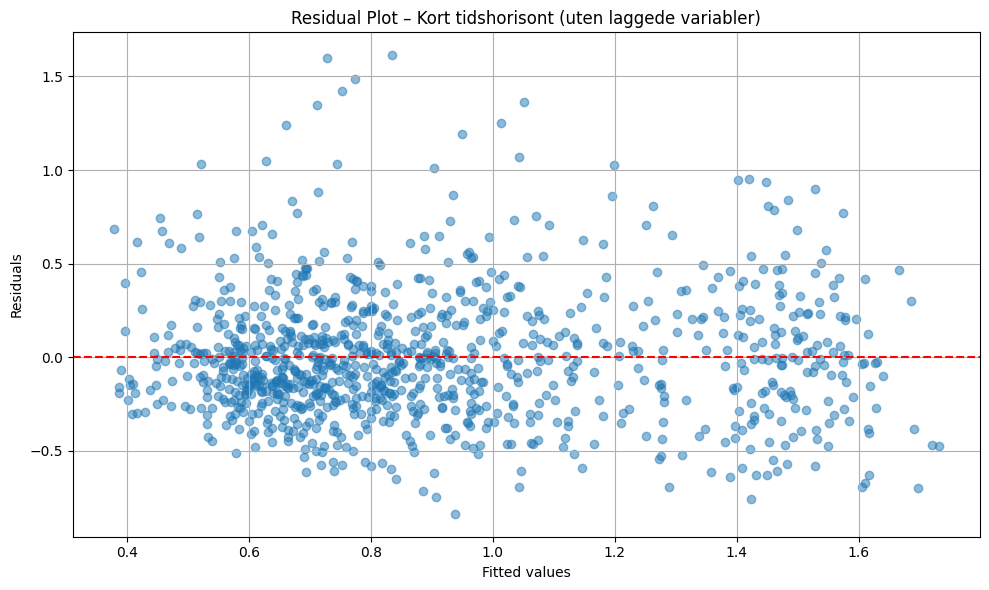

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# === 1. Last inn datasett ===
df = pd.read_csv("data/processed/summary_statistics_2017.csv", sep=";")
df.columns = df.columns.str.strip()

# === 2. Dato og måned ===
df['Dato'] = pd.to_datetime(df['Dato'], errors='coerce')
df = df.dropna(subset=['Dato'])
df['måned'] = df['Dato'].dt.to_period('M')

# === 3. Kvadrert temperatur ===
df["Temperatur2"] = df["Temperature"]**2

# === 4. Fjern rader med manglende verdier ===
relevante_kolonner = [
    "% Dødfisk", "Temperature", "Temperatur2", "Tetthet", "BA_ano",
    "% FORFORBRUK", "% Rensefisk", "badebehandling",
    "mekanisk behandling", "termisk behandling", "PO"
]
df = df.dropna(subset=relevante_kolonner)

# === 5. Estimer modell ===
formel = ('Q("% Dødfisk") ~ Q("Temperature") + Q("Temperatur2") + Q("Tetthet") + Q("BA_ano") + C(PO)')
modell = smf.ols(formel, data=df).fit(cov_type='HC3')

# === 6. Lag residual plot ===
plt.figure(figsize=(10, 6))
plt.scatter(modell.fittedvalues, modell.resid, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot – Kort tidshorisont (uten laggede variabler)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [41]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

# === 1. Last inn og forbered datasett ===
df = pd.read_csv("data/processed/summary_statistics.csv", sep=";")
df.columns = df.columns.str.strip()

df['Dato'] = pd.to_datetime(df['Dato'], errors='coerce')
df = df.dropna(subset=['Dato'])
df['måned'] = df['Dato'].dt.to_period('M')

# Kvadrert temperatur
df["Temperatur2"] = df["Temperature"]**2

# Fjern rader med manglende verdier
relevante_kolonner = [
    "% Dødfisk", "Temperature", "Temperatur2", "Tetthet", "BA_ano",
    "% FORFORBRUK", "% Rensefisk", "badebehandling",
    "mekanisk behandling", "termisk behandling", "PO"
]
df = df.dropna(subset=relevante_kolonner)

# === 2. Definer modeller ===
formel2 = 'Q("% Dødfisk") ~ Q("Temperature") + Q("Temperatur2")'
formel3 = 'Q("% Dødfisk") ~ Q("Temperature") + Q("Temperatur2")+ Q("Tetthet") + Q("BA_ano")'
formel4 = 'Q("% Dødfisk") ~ Q("Temperature") + Q("Temperatur2") + Q("Tetthet") + Q("BA_ano") + Q("% Rensefisk") + Q("badebehandling") +  Q("mekanisk behandling") + Q("termisk behandling")'

# === 3. Funksjon for å beregne VIF ===
def kalkuler_vif(formel, data):
    y, X = dmatrices(formel, data=data, return_type='dataframe')
    vif_data = pd.DataFrame()
    vif_data["Variabel"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data[vif_data["Variabel"] != "Intercept"]

# === 4. Beregn VIF for hver modell ===
vif_2 = kalkuler_vif(formel2, df)
vif_3 = kalkuler_vif(formel3, df)
vif_4 = kalkuler_vif(formel4, df)

# === 5. Skriv ut VIF-tabeller ===
print("VIF – Modell (2):\n", vif_2, "\n")
print("VIF – Modell (3):\n", vif_3, "\n")
print("VIF – Modell (4):\n", vif_4)


VIF – Modell (2):
            Variabel        VIF
1  Q("Temperature")  29.721652
2  Q("Temperatur2")  29.721652 

VIF – Modell (3):
            Variabel        VIF
1  Q("Temperature")  30.900833
2  Q("Temperatur2")  30.029750
3      Q("Tetthet")   1.034804
4       Q("BA_ano")   1.294444 

VIF – Modell (4):
                    Variabel        VIF
1          Q("Temperature")  32.195404
2          Q("Temperatur2")  32.066610
3              Q("Tetthet")   1.214952
4               Q("BA_ano")   1.333792
5          Q("% Rensefisk")   1.300247
6       Q("badebehandling")   1.159260
7  Q("mekanisk behandling")   2.750711
8   Q("termisk behandling")   2.727227


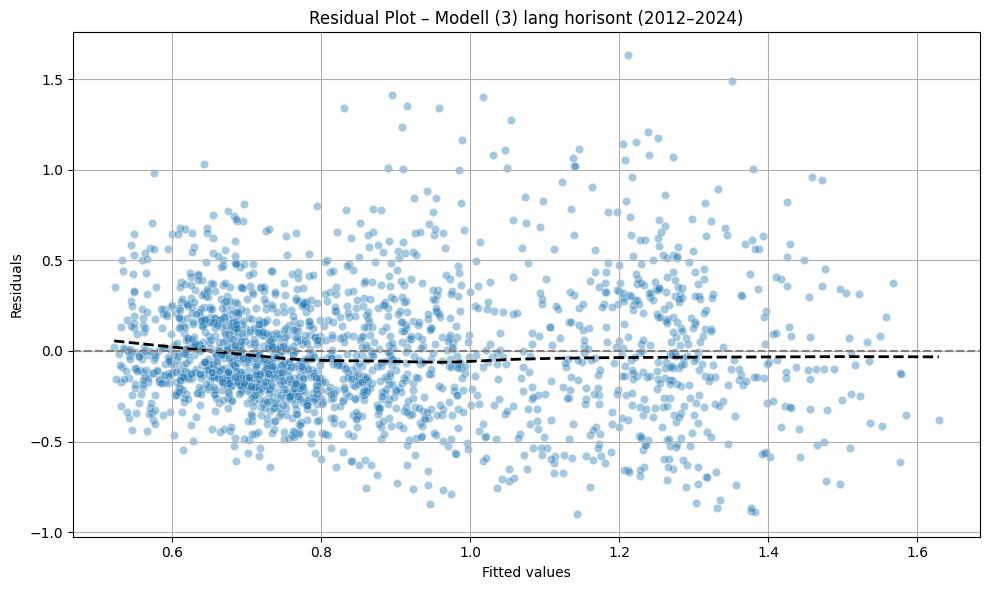

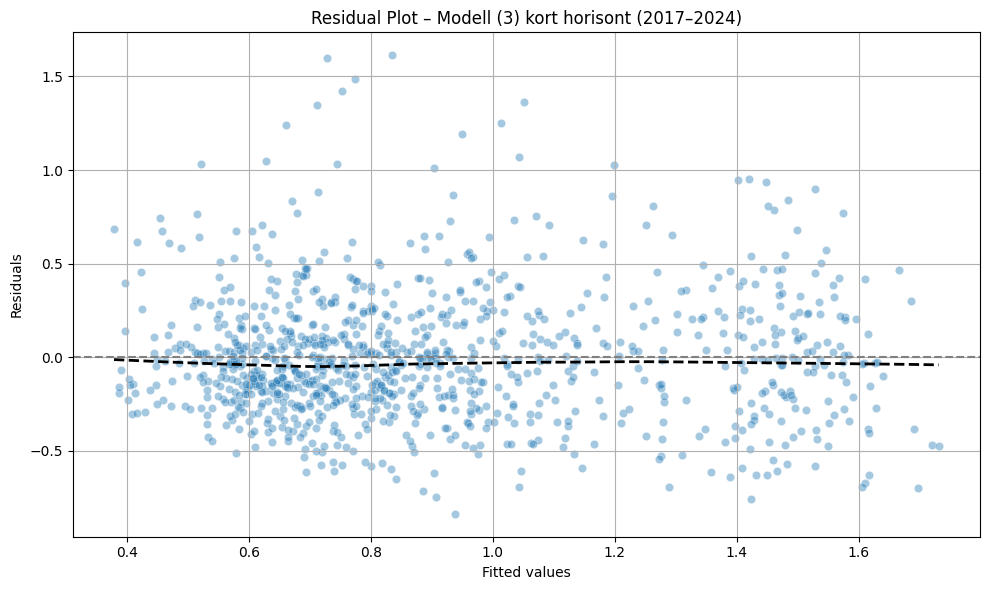

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# === 1. Last inn datasett ===
df_lang = pd.read_csv("data/processed/summary_statistics.csv", sep=";")
df_kort = pd.read_csv("data/processed/summary_statistics_2017.csv", sep=";")

# === 2. Forbered felles funksjon for preprosessering ===
def preprocess(df):
    df.columns = df.columns.str.strip()
    df['Dato'] = pd.to_datetime(df['Dato'], errors='coerce')
    df = df.dropna(subset=['Dato'])
    df['måned'] = df['Dato'].dt.to_period('M')
    df['Temperatur2'] = df['Temperature']**2
    return df

df_lang = preprocess(df_lang)
df_kort = preprocess(df_kort)

# === 3. Modellformel for Modell (3) ===
formel = 'Q("% Dødfisk") ~ Q("Temperature") + Q("Temperatur2") + Q("Tetthet") + Q("BA_ano") + C(PO)'

# === 4. Rens datasett for manglende verdier ===
relevante_kolonner = ["% Dødfisk", "Temperature", "Temperatur2", "Tetthet", "BA_ano", "PO"]
df_lang_clean = df_lang.dropna(subset=relevante_kolonner)
df_kort_clean = df_kort.dropna(subset=relevante_kolonner)

# === 5. Estimer modeller ===
model_lang = smf.ols(formel, data=df_lang_clean).fit(cov_type='HC3')
model_kort = smf.ols(formel, data=df_kort_clean).fit(cov_type='HC3')

# === 6. Funksjon for residualplott ===
def plot_residuals(model, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=model.fittedvalues, y=model.resid, alpha=0.4)
    sns.regplot(x=model.fittedvalues, y=model.resid, lowess=True,
                scatter=False, color="black", line_kws={"lw": 2, "ls": "--"})
    plt.axhline(0, color='gray', linestyle='--')
    plt.xlabel('Fitted values')
    plt.ylabel('Residuals')
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# === 7. Lag og vis plot ===
plot_residuals(model_lang, "Residual Plot – Modell (3) lang horisont (2012–2024)")
plot_residuals(model_kort, "Residual Plot – Modell (3) kort horisont (2017–2024)")
